<a href="https://colab.research.google.com/github/DhanvinS/ML_Models-Supervised-and-Unsupervised/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
# Import breast cancer dataset
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
print('Feature name list: \n', feature_names)

Feature name list: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
data_df = pd.concat([X_df, y_df], axis=1)
print('\nA few rows from the data: \n', data_df.head())
data_df.to_csv('BreastCancer.csv')
# Original data size
print('Original data size', X.shape)


A few rows from the data: 
       0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  0   
0  0.4601  0.11890   0  
1  0.27

In [8]:
nFeat = 6
selector = SelectKBest(chi2, k = nFeat)
X_new = selector.fit_transform(X_df, y_df)
X_new

array([[ 122.8  , 1001.   ,  153.4  ,   25.38 ,  184.6  , 2019.   ],
       [ 132.9  , 1326.   ,   74.08 ,   24.99 ,  158.8  , 1956.   ],
       [ 130.   , 1203.   ,   94.03 ,   23.57 ,  152.5  , 1709.   ],
       ...,
       [ 108.3  ,  858.1  ,   48.55 ,   18.98 ,  126.7  , 1124.   ],
       [ 140.1  , 1265.   ,   86.22 ,   25.74 ,  184.6  , 1821.   ],
       [  47.92 ,  181.   ,   19.15 ,    9.456,   59.16 ,  268.6  ]])

In [10]:
X_new_features_mask = selector.get_support()
X_new_feature_names = feature_names[X_new_features_mask]
print('\nSelected', nFeat, 'features using univariate feature selection:\n', X_new_feature_names)


Selected 6 features using univariate feature selection:
 ['mean perimeter' 'mean area' 'area error' 'worst radius'
 'worst perimeter' 'worst area']


In [11]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X, y)

Text(0.5, 1.0, 'feature importance')

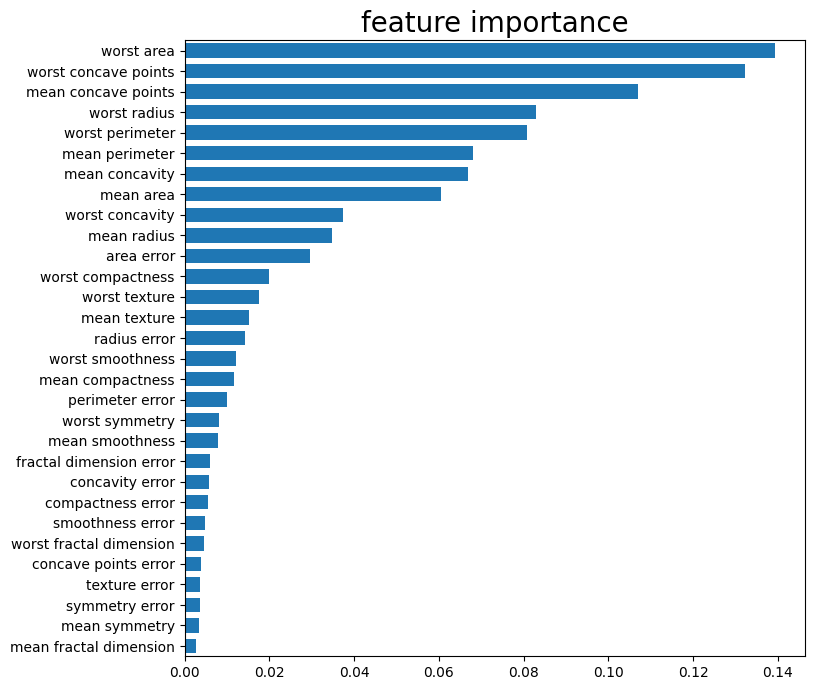

In [13]:
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax1.set_title('feature importance', fontsize = 20)

In [14]:
print('\n', nFeat, 'features with the highest scores',
feature_names[tree_importance_sorted_idx[:30-nFeat-1:-1]])
print('\nFeature importance scores:\n', clf.feature_importances_)
from sklearn.feature_selection import SelectFromModel
# Here we use the default feature selection criteria
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
#print('\nA few rows of 6 selected feastures using feature importance\n',
# X_new[:nFeat, :])
plt.show()


 6 features with the highest scores ['worst area' 'worst concave points' 'mean concave points' 'worst radius'
 'worst perimeter' 'mean perimeter']

Feature importance scores:
 [0.03484323 0.01522515 0.06799034 0.06046164 0.00795845 0.01159704
 0.06691736 0.10704566 0.00342279 0.00261508 0.0142637  0.00374427
 0.01008506 0.02955283 0.00472157 0.00561183 0.00581969 0.00375975
 0.00354597 0.00594233 0.08284828 0.01748526 0.0808497  0.13935694
 0.01223202 0.01986386 0.03733871 0.13222509 0.00817908 0.00449731]
